#### Real Time Emotion Detection from Facial Expression using CNN

In [1]:
#pip install plantcv

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Utils_funX import *
from Data_Preprocessing import *
from keras.layers import *

In [4]:
%env JOBLIB_TEMP_FOLDER=/tmp

env: JOBLIB_TEMP_FOLDER=/tmp


##### Importing the dataset

In [5]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

##### Cleaning the Data 

In [6]:
#Since we have no Null values in the dataset--> we only remov the Duplicates
train_data = remove_duplicates(train_data)
test_data = remove_duplicates(test_data)
print("\nThe shape of the Traning samples after Data Preprocessing is {} \n".format(train_data.shape))
print("\nThe shape of the Testing samples after after Data Preprocessing is {} \n".format(test_data.shape))


The shape of the Traning samples after Data Preprocessing is (27515, 2) 


The shape of the Testing samples after after Data Preprocessing is (7092, 1) 



##### Train and Test Data Preparation 

In [7]:
x_train,y_train,x_test,y_test = Data_Preparation(train_data,test_data)

In [8]:
import gc
del train_data
del test_data
gc.collect()

82

In [9]:
print("\nThe train and test data Shapes are :",x_train.shape,y_train.shape,x_test.shape,y_test.shape)


The train and test data Shapes are : (27515, 2304) (27515,) (7092, 2304) (0,)


##### Normalization

In [10]:
x_train,x_test=Data_Normalization(x_train,x_test)

In [11]:
width = 48
height = 48

In [12]:
x_train = x_train.reshape(x_train.shape[0],width,height,)
x_test = x_test.reshape(x_test.shape[0],width,height,)

In [13]:
x_train.shape

(27515, 48, 48)

In [14]:
from keras.utils import to_categorical

y_train = to_categorical(y_train,7)
print(y_train.shape)
y_train

(27515, 7)


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [15]:
y_test = to_categorical(y_test,7)
print(y_test.shape)
y_test

(0, 7)


array([], shape=(0, 7), dtype=float32)

In [16]:
x_train[0]

array([[0.01138692, 0.01301362, 0.01333896, ..., 0.00845885, 0.00699482,
        0.00666948],
       [0.01057357, 0.00992289, 0.00943488, ..., 0.00910954, 0.00845885,
        0.00715749],
       [0.00813351, 0.00699482, 0.0087842 , ..., 0.00797084, 0.00910954,
        0.0076455 ],
       ...,
       [0.014803  , 0.01057357, 0.00683215, ..., 0.01171226, 0.00910954,
        0.00699482],
       [0.01252561, 0.01333896, 0.01285095, ..., 0.01708038, 0.01138692,
        0.00748283],
       [0.01252561, 0.01171226, 0.0136643 , ..., 0.01724305, 0.01773106,
        0.01333896]])

#### Data Augmentation

In [17]:
x_train.shape,x_test.shape

((27515, 48, 48), (7092, 48, 48))

In [18]:
!pip3 install import_ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2975 sha256=e149d2b5e2130eaa603dced473befd9612905b2c4783a8eb9a49c1c75bad5453
  Stored in directory: /root/.cache/pip/wheels/b1/5e/dc/79780689896a056199b0b9f24471e3ee184fbd816df355d5f0
Successfully built import-ipynb


In [19]:
import cv2
from PIL import Image
from keras.preprocessing.image import array_to_img
from keras.preprocessing.image import img_to_array

In [20]:
x_t = []

for i in range(len(x_train)):
    x = x_train[i]
    x = array_to_img(np.reshape(x,(48,48,1)))
    x = x.resize((96,96))
    x = np.reshape(img_to_array(x),(96,96))
    
    x_t.append(x)
x_train = np.array(x_t)

x_train.shape

(27515, 96, 96)

In [21]:
del x
del x_t
gc.collect()

20

In [22]:
x_t = []

for i in range(len(x_test)):
    x = x_test[i]
    x = array_to_img(np.reshape(x,(48,48,1)))
    x = x.resize((96,96))
    x = np.reshape(img_to_array(x),(96,96))
    
    x_t.append(x)
x_test = np.array(x_t)

x_test.shape

(7092, 96, 96)

In [23]:
del x_t
del x
gc.collect()

40

In [24]:
import import_ipynb
from Brightness_And_Sharpness_Augmented_data2 import *

importing Jupyter notebook from Brightness_And_Sharpness_Augmented_data2.ipynb



Five Sample of image after vertical flip :



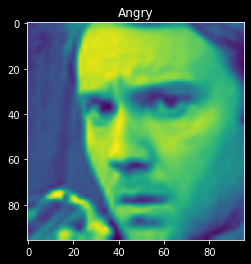

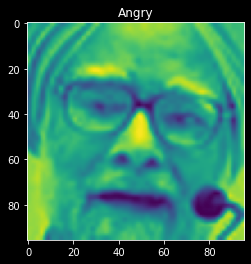

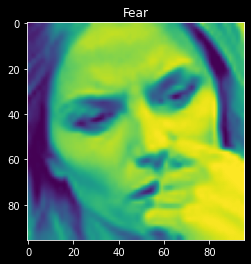

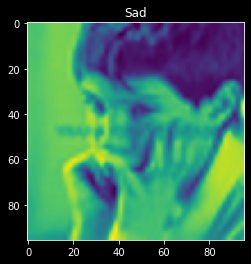

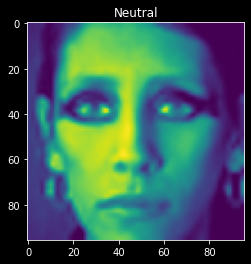

In [25]:
# adding two type of data 1 -> vertically flipped and horizontally fliped
# therefore After augmentation

x_train1,y_train1=Brightness_And_Sharpness_Augmented_data(x_train,y_train,len(x_train))
x_train2,y_train2=Data_Augmentation(x_train,y_train)

x_train = np.concatenate((x_train1,x_train2)) 
y_train = np.concatenate((y_train1,y_train2))

In [26]:
del x_train1
del y_train1
del x_train2
del y_train2
gc.collect()

11071

In [27]:
x_train.shape, y_train.shape

((165090, 96, 96), (165090, 7))

In [28]:
x_train.shape, y_train.shape

((165090, 96, 96), (165090, 7))

In [29]:
#Storing the final Augmented X and Y values in the  a csv file
from numpy import savez_compressed
savez_compressed('x_train.npz',x_train)
savez_compressed('x_test.npz',x_test)
savez_compressed('y_train.npz',y_train)
savez_compressed('y_test.npz',y_test)